In [0]:
import keras as k 
from keras.datasets import cifar10
from matplotlib import pyplot as p
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix



In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 57s 0us/step


In [0]:
# hyperparameter settings
no_class = 10 
batch_size = 32
epoch = 10


In [0]:
# Data Preprocessing
y_train = k.utils.to_categorical(y_train, no_class)
y_test = k.utils.to_categorical(y_test, no_class)

# pixel values range from 0 to 255 - normalize 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255


**Feature Standardization: Mean 0, Standard Deviation 1**

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(x_train)


In [0]:
def plot_sample():
  for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=batch_size):
    for i in range(0, 9):
      p.subplot(330 + 1 + i)
      p.imshow(X_batch[i], cmap=p.get_cmap('gray'))
    return p.show()
	

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


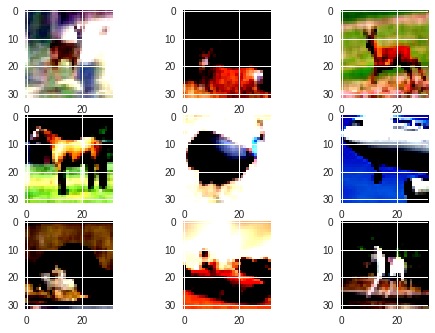

In [0]:
plot_sample()

ZCA Whitening

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for in

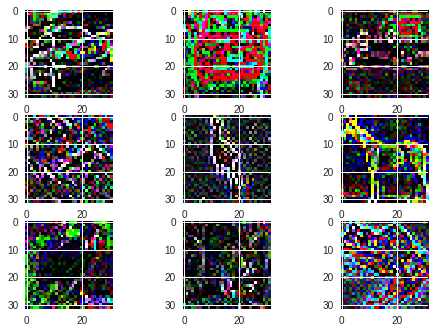

In [0]:
datagen = ImageDataGenerator(zca_whitening= True)
datagen.fit(x_train)
plot_sample()

Random rotations

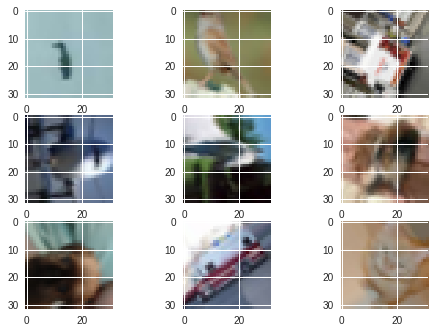

In [0]:
datagen = ImageDataGenerator(rotation_range= 90)
datagen.fit(x_train)
plot_sample()

Random Shifts

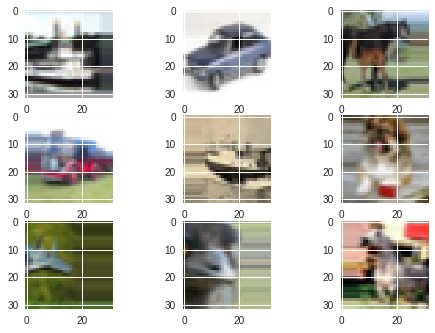

In [0]:
shift = 0.4
datagen = ImageDataGenerator(width_shift_range=shift)
datagen.fit(x_train)
plot_sample()

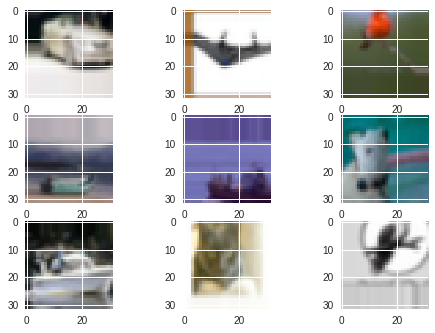

In [0]:
shift = 0.3
datagen = ImageDataGenerator(width_shift_range=shift,height_shift_range=shift)
datagen.fit(x_train)
plot_sample()

Flips

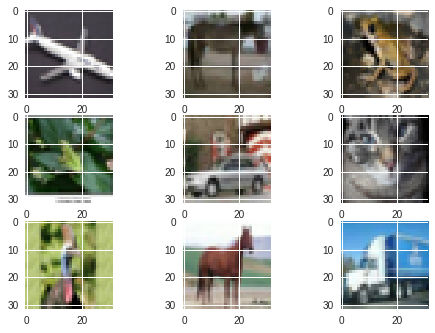

In [0]:
datagen = ImageDataGenerator(horizontal_flip= True)
datagen.fit(x_train)
plot_sample()

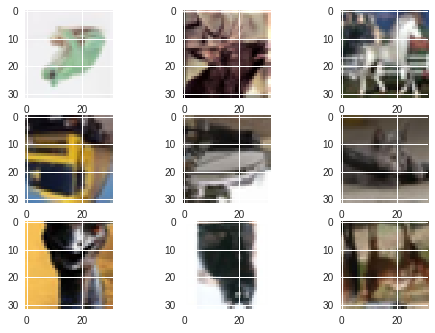

In [0]:
datagen = ImageDataGenerator(horizontal_flip= True, vertical_flip= True)
datagen.fit(x_train)
plot_sample()

In [0]:
def model_creation():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_class))
  model.add(Activation('softmax'))
  opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  return model

In [0]:

cnn_basemodel = model_creation() 
  

In [0]:
cnn_1 = cnn_basemodel.fit(x_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=(x_test,y_test),shuffle=True)
acc = cnn_basemodel.evaluate(x_test, y_test, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 460us/step - loss: 1.7458 - acc: 0.3764 - val_loss: 1.4821 - val_acc: 0.4815
Epoch 2/10
50000/50000 [==============================] - 22s 448us/step - loss: 1.4426 - acc: 0.4902 - val_loss: 1.3360 - val_acc: 0.5296
Epoch 3/10
50000/50000 [==============================] - 22s 447us/step - loss: 1.3194 - acc: 0.5351 - val_loss: 1.2487 - val_acc: 0.5614
Epoch 4/10
50000/50000 [==============================] - 22s 447us/step - loss: 1.2495 - acc: 0.5606 - val_loss: 1.1892 - val_acc: 0.5826
Epoch 5/10
50000/50000 [==============================] - 22s 449us/step - loss: 1.1951 - acc: 0.5805 - val_loss: 1.1577 - val_acc: 0.5920
Epoch 6/10
50000/50000 [==============================] - 22s 445us/step - loss: 1.1558 - acc: 0.5936 - val_loss: 1.1303 - val_acc: 0.6087
Epoch 7/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.1165 - acc: 0.6105 - val_loss: 1.

In [0]:
print(cnn_1.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
def plot_modelacc(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['acc'])
            p.plot(fit_model.history['val_acc'])
            p.title("MODEL ACCURACY")
            p.xlabel("# of EPOCHS")
            p.ylabel("ACCURACY")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()

In [0]:
def plot_model_loss(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['loss'])
            p.plot(fit_model.history['val_loss'])
            p.title("MODEL LOSS")
            p.xlabel("# of EPOCHS")
            p.ylabel("LOSS")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()


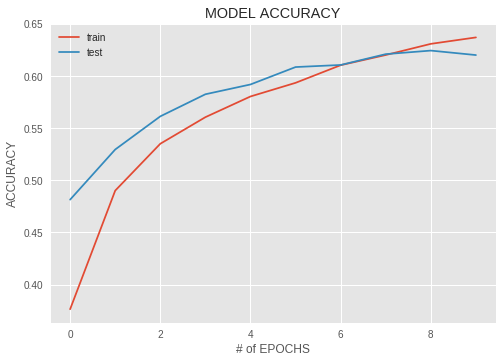

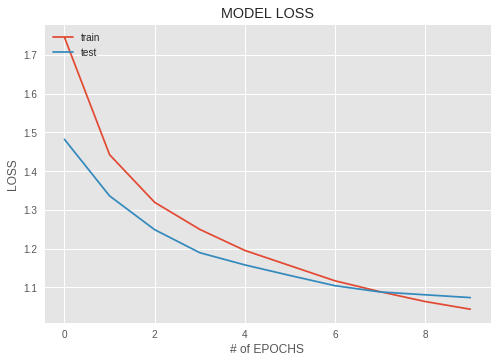

In [0]:
plot_modelacc(cnn_1)
plot_model_loss(cnn_1)

In [0]:
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

Test data loss: 1.0732233697891236
Test data accuracy: 62.019999999999996


In [0]:
data_aug = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,height_shift_range=0.1,
                              horizontal_flip=True,zca_whitening=False, 
                              featurewise_center=False)

In [0]:
data_aug.fit(x_train,augment = True)

In [0]:
cnn_basemodel.fit_generator(data_aug.flow(x_train, y_train,batch_size=batch_size),
                            epochs=epoch,steps_per_epoch=x_train.shape[0],
                            validation_data=(x_test, y_test)
                           )
                   

Epoch 1/10
50000/50000 [==============================] - 1209s 24ms/step - loss: 1.2863 - acc: 0.5480 - val_loss: 1.1317 - val_acc: 0.6295
Epoch 2/10
50000/50000 [==============================] - 1204s 24ms/step - loss: 1.1909 - acc: 0.5896 - val_loss: 1.1030 - val_acc: 0.6495
Epoch 3/10
50000/50000 [==============================] - 1195s 24ms/step - loss: 1.2042 - acc: 0.5891 - val_loss: 1.1877 - val_acc: 0.6423
Epoch 4/10
50000/50000 [==============================] - 1198s 24ms/step - loss: 1.2221 - acc: 0.5838 - val_loss: 1.3016 - val_acc: 0.6237
Epoch 5/10
50000/50000 [==============================] - 1200s 24ms/step - loss: 1.2312 - acc: 0.5816 - val_loss: 1.1844 - val_acc: 0.6437
Epoch 6/10
50000/50000 [==============================] - 1158s 23ms/step - loss: 1.2381 - acc: 0.5798 - val_loss: 1.1912 - val_acc: 0.6428
Epoch 7/10
50000/50000 [==============================] - 1151s 23ms/step - loss: 1.2459 - acc: 0.5777 - val_loss: 1.2129 - val_acc: 0.6347
Epoch 8/10
50000/500

In [0]:
acc = cnn_basemodel.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 100us/step


In [0]:
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

Test data loss: 1.2492859506607055
Test data accuracy: 62.129999999999995
